In [1]:
# Created by: Jessica Gallo
# Created: 12/30/2020
# Last Modified: 12/30/2020
# CSC 732 Pattern Recognition & Neural Networks
# Using SVM for Classification of Data
# Part 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
import pylab as pl

%matplotlib inline

## Data Preparation


In [3]:
#reading data
filename = 'C:\\Users\\User\\Downloads\\HW3_CSC732_Jessica_Gallo_Asliddin_Asliev\\PART1\\Dataset\\seeds_dataset.txt'
names = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry coef.', 'groove length', 'classs']
dataSetCSV = pd.read_csv(filename, '\t', error_bad_lines=False, names = names)
dataset = pd.DataFrame(dataSetCSV)
dataset.head(5)


,area,perimeter,compactness,length,width,asymmetry coef.,groove length,classs
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


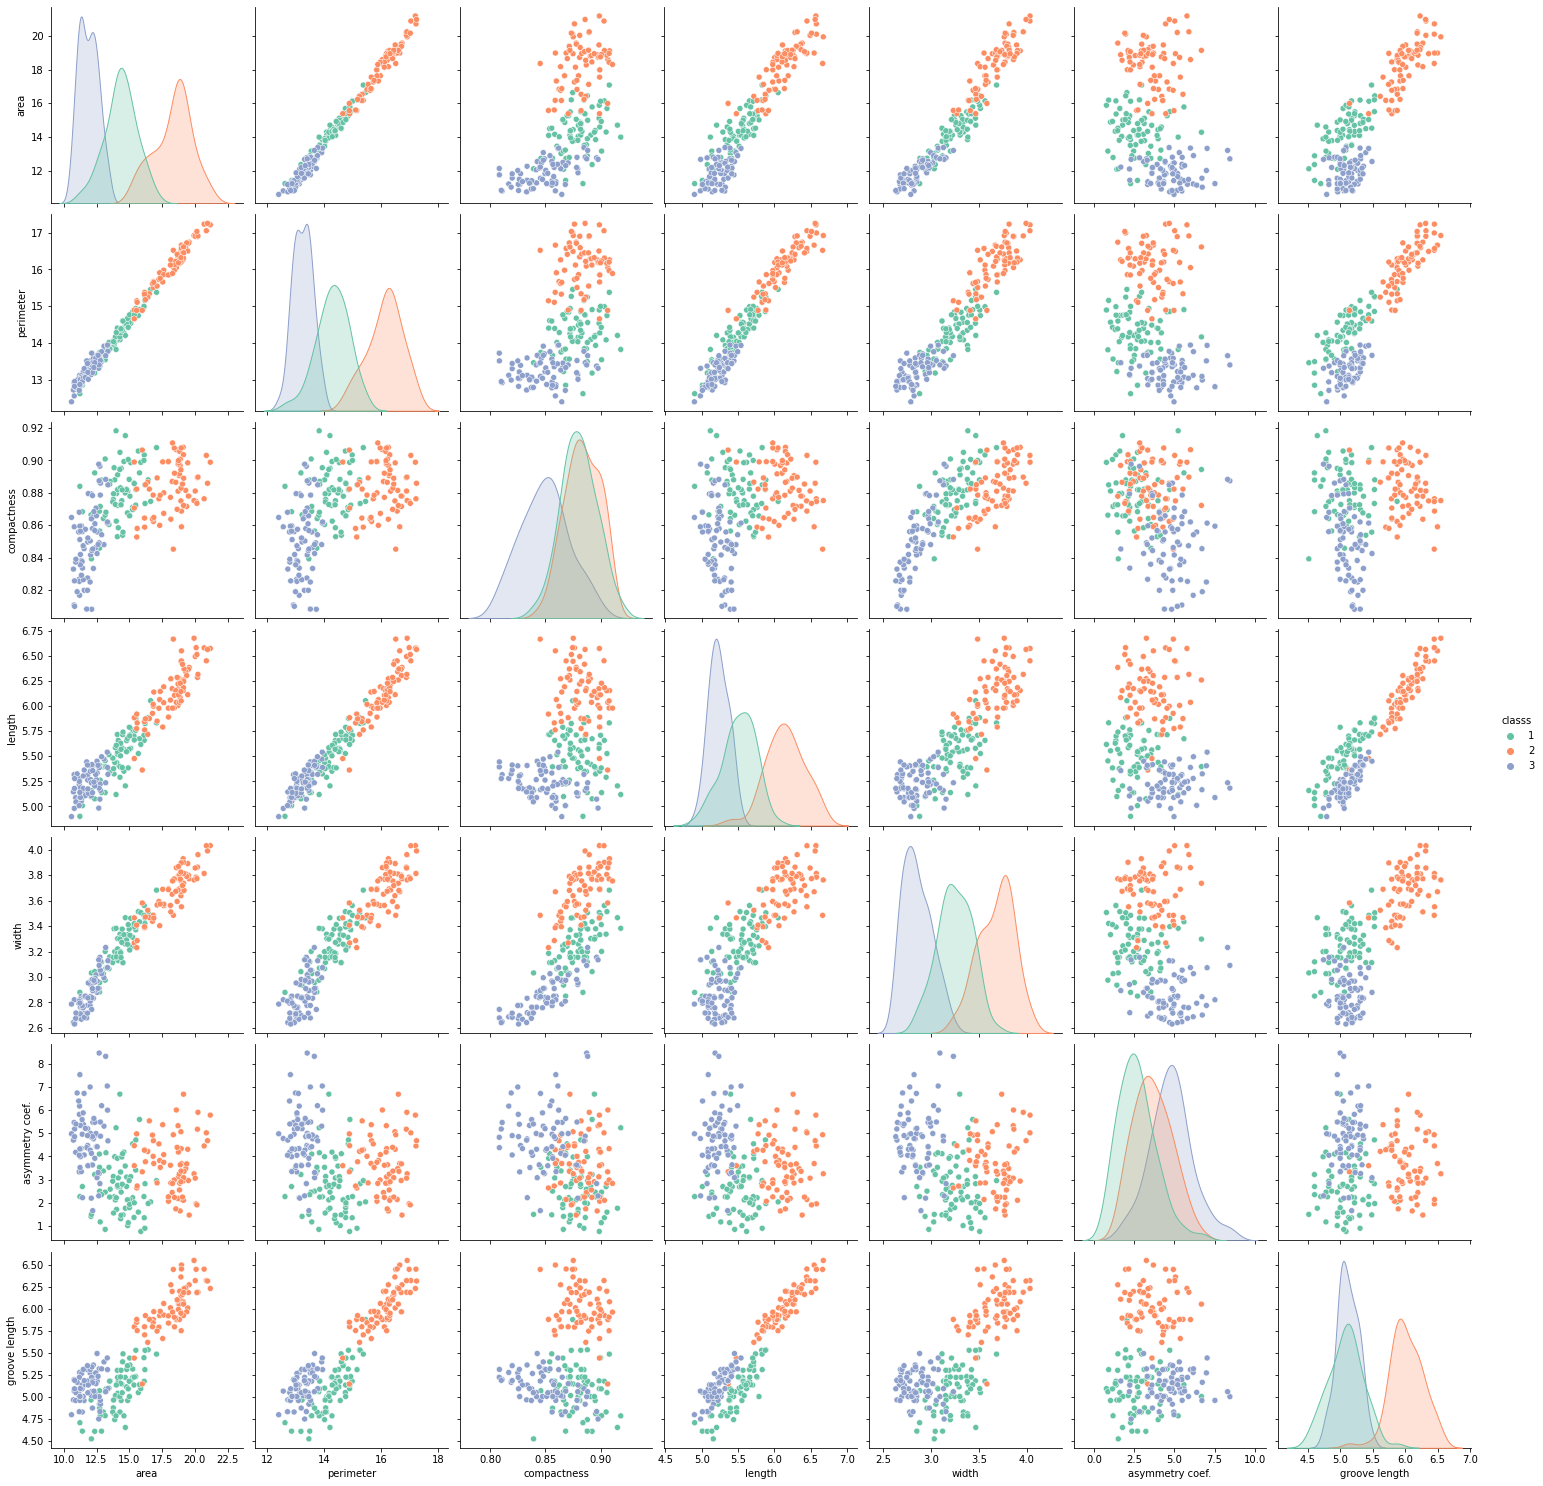

In [4]:
#visualising data
# sns.set(style = 'whitegrid', context='notebook')
# sns.pairplot(dataset, size = 2.5)
# plt.tight_layout()
# plt.show()
# sns.reset_orig()

pg = sns.pairplot(dataset, hue = 'classs', palette = 'Set2', height = 3)

In [5]:
#dividing dataset into training and testing
y = dataset.classs
X = dataset.drop(labels='classs', axis = 'columns')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)


In [6]:
#function to visualize classifiers
#takes 3 inputs, classifier, X and y

def visualizeClf(clf, X, y, title):
  for i in range(0, X.shape[0]):
    if y[i] == 1:
      c1 = pl.scatter(X[i,0],X[i,1],c='r',    s=50,marker='+')
    elif y[i] == 2:
      c2 = pl.scatter(X[i,0],X[i,1],c='g',    s=50,marker='o')
    elif y[i] == 3:
      c3 = pl.scatter(X[i,0],X[i,1],c='b',    s=50,marker='*')
  
  pl.legend([c1, c2, c3], ['Class 1', 'Class 2',   'Class 3'])
  x_min, x_max = X[:, 0].min() - 1,   X[:,0].max() + 1
  y_min, y_max = X[:, 1].min() - 1,   X[:, 1].max() + 1
  # print('xmin, xmax: ', x_min, x_max)
  # print('ymin, ymax: ', y_min, y_max)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
  # print('xx: ', xx)
  # print('yy: ', yy)
  Z = clf.predict(np.c_[xx.ravel(),  yy.ravel()])
  Z = Z.reshape(xx.shape)
  pl.contour(xx, yy, Z)
  pl.title(title)
  # pl.axis('off')
  pl.show()


## Part A
Perform SVC with linear kernel as shown in the scikit-learn(1.4.1) and do the ploting.

In [7]:
# SVC with linear kernel
# we can see from the pairplot above that 
# realtionship between 'length' and 'groove length'
# is linearly separable. therefore i chose 'length' and 'groove length' as my input

X_lg = X[['length', 'groove length']]

X_lg_train, X_lg_test, y_lg_train, y_lg_test =train_test_split(X_lg, y, test_size = .2, random_state = 111)
SVCLinKernel = svm.SVC(kernel='linear')
SVCLinKernel.fit(X_lg_train, y_lg_train)

#score/classify
print('Score: %.4f' % SVCLinKernel.score(X_lg_test, y_lg_test))


Score: 0.9524


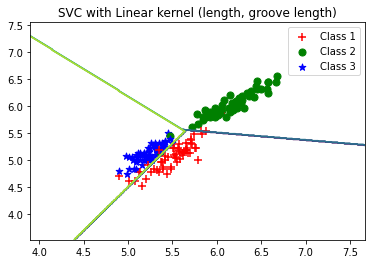

In [8]:
#visualizing classifier
title = 'SVC with Linear kernel (length, groove length)'
y_lg_train.reset_index(drop=True, inplace=True)
visualizeClf(SVCLinKernel, X_lg_train.values, y_lg_train, title)

In [9]:
#same thing with different attributes
X_length_width = X[['length', 'width']]
X_train_lw, X_test_lw, y_train_lw, y_test_lw = train_test_split(X_length_width, y, test_size = .2, random_state = 7)

SVCModel_linear = svm.SVC(kernel='linear')
SVCModel_linear.fit(X_train_lw, y_train_lw)

pred_val_lw = SVCModel_linear.predict(X_test_lw)

#result = pd.DataFrame({'Actual' : y_test_lw, 'Predicted':pred_val, 'Check': y_test_lw == pred_val})
print("Score: %.4f" % SVCModel_linear.score(X_test_lw, y_test_lw))
#result


Score: 0.8810


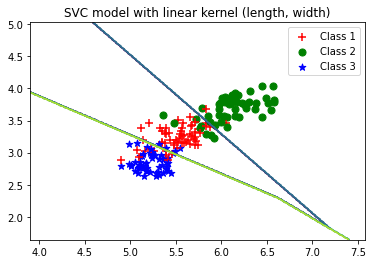

In [10]:
#visualize model
title = 'SVC model with linear kernel (length, width)'
y_train_lw.reset_index(drop=True, inplace=True)
visualizeClf(SVCModel_linear, X_train_lw.values, y_train_lw, title)

In [11]:
#SVC with linear kernel
# reduced dimentionality using PCA to visualize classifier 

X_train, X_test, y_train, y_test =   train_test_split(X,   y, test_size=0.20, random_state=7)
pca = PCA(n_components=2).fit(X_train)
X_pca_2d = pca.transform(X_train)
svmClassifier_2d =   svm.SVC(kernel = 'linear', random_state=111).fit(   X_pca_2d, y_train)

#score
X_test_2d = pca.transform(X_test)
print("Score: %.4f" %svmClassifier_2d.score(X_test_2d, y_test))


Score: 0.9524


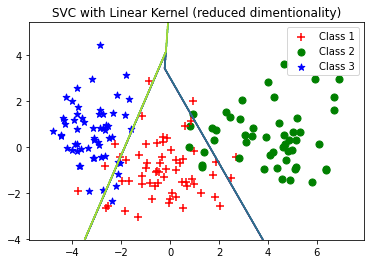

In [12]:
#visualize

title = 'SVC with Linear Kernel (reduced dimentionality)'
y_train.reset_index(drop=True, inplace=True)
visualizeClf(svmClassifier_2d, X_pca_2d, y_train, title)

## Part B
Perform multiclass classification (1.4.1.1), calcualte the score and probabilities (1.4.1.2) and do the plotting.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)

#implementing multiclass linear classifiers, one with 'ovr' decision function shape and the other 'ovo'
# 'ovr' - one vs. rest
# 'ovo' - one vs. one

ovr_clf = svm.LinearSVC()
ovr_clf.fit(X_train, y_train)

ovo_clf = svm.SVC(decision_function_shape = 'ovo')
ovo_clf.fit(X_train, y_train)

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC(decision_function_shape='ovo')

In [14]:
#calculating the score and probabilities

print("Score (OVR decision function shape) %.5f" % ovr_clf.score(X_test, y_test))
print("Score (OVO decision function shape) %.5f" % ovo_clf.score(X_test, y_test))

dec_fun_ovr = ovr_clf.decision_function(X_test)
pred_val_ovr = ovo_clf.predict(X_test)

dec_fun_ovo = ovo_clf.decision_function(X_test)
pred_val_ovo = ovo_clf.predict(X_test)

#creating a table to see results

ovr_table = pd.DataFrame({'Actual' : y_test, 'Predicted':pred_val_ovr, '1': dec_fun_ovr[:,0], '2': dec_fun_ovr[:,1], '3': dec_fun_ovr[:,2]})
ovo_table = pd.DataFrame({'Actual' : y_test, 'Predicted':pred_val_ovo, '1/2': dec_fun_ovo[:,0], '1/3': dec_fun_ovo[:,1], '2/3': dec_fun_ovo[:,2]})


Score (OVR decision function shape) 0.97619
Score (OVO decision function shape) 0.95238


In [15]:
print("One vs. Rest table")
ovr_table.reset_index(drop=True, inplace=True)
ovr_table

One vs. Rest table


,Actual,Predicted,1,2,3
0,2,2,-1.550643,2.087441,-3.383594
1,1,1,1.740861,-2.259157,-1.361520
2,2,2,-1.357821,1.505085,-2.786369
3,1,1,1.944038,-1.050750,-3.810139
4,1,3,0.181600,-1.411952,-0.384438
5,1,1,1.728949,-1.251240,-3.116075
6,2,2,-0.804638,1.874217,-4.341493
7,1,1,1.350256,-1.626043,-1.999076
8,1,1,1.420744,-1.430324,-2.173916
9,3,3,-1.373927,-1.566457,2.123036


In [16]:
print("One vs. One table")
ovo_table.reset_index(drop=True, inplace=True)
ovo_table

One vs. One table


,Actual,Predicted,1/2,1/3,2/3
0,2,2,-1.509262,2.248953,1.554789
1,1,1,1.977802,0.343307,-0.836882
2,2,2,-1.310391,2.128510,1.434870
3,1,1,0.713515,2.268906,0.503797
4,1,3,1.537976,-0.034056,-0.719209
5,1,1,0.872198,1.908117,0.306174
6,2,2,-1.478367,2.751934,1.712848
7,1,1,1.486400,1.155138,-0.276918
8,1,1,1.317424,0.976690,-0.251841
9,3,3,2.019491,-1.593260,-1.553558


## Part C
Perform binary classification using non-linear SVC with RBF kernel where the target to predict is XOR of the inputs and one more logic function by your choice. Make plotting of the color map which illustrates the decision function learned by SVC.

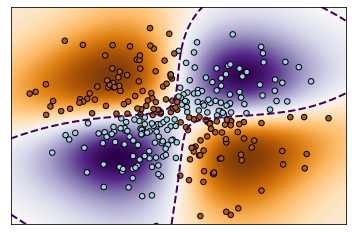

In [17]:

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

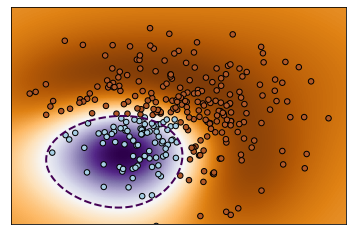

In [18]:

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_or(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()